<a href="https://colab.research.google.com/github/bernardcz/bcz/blob/master/4_spatial_patterns_in_excavation_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More about spatial patterns



Understanding the meanings behind patterns of finds recovered through excavation is a tricky problem. We hope to distinguish activity areas, places devoted to domestic and industrial use, or inhabited places that are distinct from liminal ones. We often want to discern change over time, identifying areas with finds associated with different temporal periods. 

To successfully unravel these patterns, we must look not only at the distributions of different types of finds, but how they correlate with one another, the character of the contexts in which they were recovered, and their own physical and social characteristics. Are they likely to be curated? Are they light and likely to be moved from one area to another by post-depositional processes? It's all a bit of a mess. 

Importantly, all these processes are spatial. Alignments or proximity between areas with similar (or quite different) finds is potentially meaningful. 

The aim of this exercise is for you to:
* learn to work real special finds data from an excavation, in all its messiness, to look for spatial patterns and relationships
* start thinking about quantitative and spatial approaches to finds data from excavations and how they can help us better understand the patterns we see

You'll do this using data collected by the Gabii Project, a 10+ year excavation in central Italy. 

 


### Let's get started... Remember to hit play or type 'Ctrl'+'Enter' to run the code in any cell in the page.

In [0]:
# as usual, start by getting your tools

%matplotlib inline
# Matplotlib is your tool for drawing graphs and basic maps. You need this!
!pip install fiona
!pip install geopandas
import pandas as pd
import requests
import fiona
import geopandas as gpd
import ipywidgets as widgets

# These are what we call prerequisites. They are basic toosl you need to get started.
# Pandas manipulate data. Geo-pandas manipulate geographic data. They're also black and white and like to eat bamboo... 
# You need these to manipulate your data!
# Fiona helps with geographic data.
# Requests are for asking for things. It's good to be able to ask for things.
# ipywidgets supports interactivity.


# Remember to hit Ctrl+Enter to make things happen!

     |████████████████████████████████| 11.9MB 4.9MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=f83c534d72d8ef7557fa4947ef9e7cedaa0cf0abc56f63c9a39660f4fa25b5a1
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
     |████████████████████████████████| 921kB 4.8MB/s 
     |████████████████████████████████| 10.1MB 37.4MB/s 


In [0]:
# then get your data

url = 'http://ropitz.github.io/digitalantiquity/data/gabii_SU.geojson'
# This is where I put the data. It's in a format called geojson, used to represent geometry (shapes) and attributes (text).
request = requests.get(url)
# Please get me the data at that web address (url)
b = bytes(request.content)
# I will use the letter 'b' to refer to the data, like a nickname
with fiona.BytesCollection(b) as f:
    crs = f.crs
    gabii_su_poly = gpd.GeoDataFrame.from_features(f, crs=crs)
    print(gabii_su_poly.head())
# I will use the fiona tool to wrap up all the data from 'b', check the coordinate system (crs) listed in the features
# and print out the first few lines of the file so I can check everything looks ok. 
# Don't worry if you don't understand all the details of this part!



  DESCRIPTIO  ...                                           geometry
0        BOT  ...  POLYGON Z ((1415906.023 5144201.194 64.774, 14...
1         SK  ...  POLYGON Z ((1415940.483 5144159.515 62.910, 14...
2         OT  ...  POLYGON Z ((1415956.547 5144171.764 62.566, 14...
3         OT  ...  POLYGON Z ((1415955.891 5144171.889 62.624, 14...
4         OT  ...  POLYGON Z ((1415956.267 5144171.289 62.618, 14...

[5 rows x 6 columns]


Start by visualizing the spatial data for all the contexts (stratigraphic units) from the excavation we'll be exploring

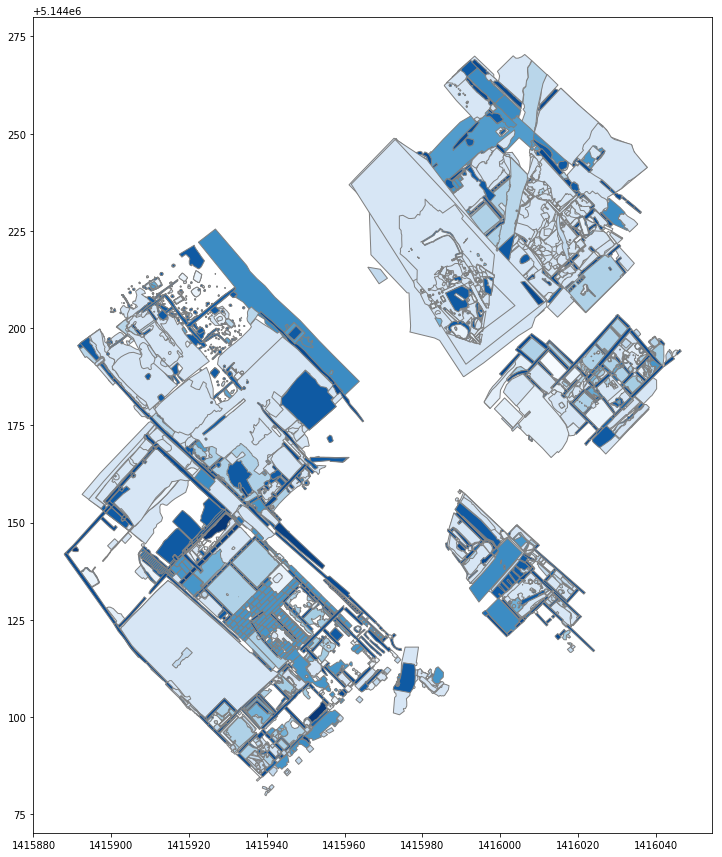

In [0]:
# Now we have polygons, the shapes of our contexts. Let's visualise the data to double check that all is well

gabii_map1 = gabii_su_poly.plot(column='DESCRIPTIO', cmap='Blues', edgecolor='grey', figsize=(15, 15));
# 'plot' means draw me an image showing the geometry of each feature in my data. 
# We want to control things like the color of different types of features on our map. 
# I used the 'Blues' colorscale command (cmap stands for 'colour map') 
# and asked it to draw the polygons differently based on the type of feature.


The colorscale options are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

Swap out 'Blues' in the cell above for any of these options...


###Now load in the data on the special finds. 

Like many excavations, not every special find has spatial coordinates associated with it (because in real archaeology life things are found in the sieve, the wheelbarrow, and during washing). 

This data is not yet spatial, each special find is associated with a stratigraphic unit that does have spatial data, which we loaded in just above. So logically we can merge our non-spatial special finds data with our spatial stratigraphic units data to make all our data spatial.



In [0]:
# Now I'm going to bring in all the basic Gabii special finds data - descriptions, object types, IDs and the contexts from which they come.
# We've had a few special finds over the years.
sf_su = pd.read_csv("https://raw.githubusercontent.com/ropitz/gabii_experiments/master/spf_SU.csv")
sf_su

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,0,1,coin,Coin
1,0,15,coin,Coin
2,0,18,coin,Coin
3,0,80,ceramic fragment,Ceramic Fragment
4,0,82,fish hook,NaN
5,0,83,coin,Coin
6,0,84,coin,Coin
7,0,85,coin,Coin
8,0,86,coin,Coin
9,0,87,coin,Coin


One of our area supervisors, Troy, is super excited about tools related to textile production. They're a great example of how we think about special finds at Gabii. Multiple types of finds are related to textile production. Do we find all types everywhere? Are certain types of tools more concentrated in one type of context or one area than others? Troy has lots of questions about the patterns of places where we find these tools. Do they provide evidence for early textile production? Are they a major factor in the city's early wealth? Do we find the same things in later periods? After all, people under the Republic and Empire wore clothes... Loom Weights, spools, and spindle whorls are the most common weaving tools at Gabii.


In [0]:
#Let's pull all those find types out of the big list. 
#We're selecting the finds data we want to work with before merging with the spatial data. We could do these operations in reverse if we wanted to.
types = ['Loom Weight','Spool','Spindle Whorl']
textile_tools = sf_su.loc[sf_su['SF_OBJECT_TYPE'].isin(types)]
textile_tools

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
25,0,375,spool,Spool
33,0,564,spool,Spool
34,0,565,loom weight,Loom Weight
36,0,567,spool,Spool
38,0,651,spindle whorl,Spindle Whorl
46,0,709,loom weight,Loom Weight
48,0,711,loom weight,Loom Weight
64,0,952,spindle whorl,Spindle Whorl
92,0,1226,Spool fragment,Spool
94,0,1250,Spindle whorl fragment,Spindle Whorl


Presence or absences isn't everything. You may want to know how many of a certain type of find is present in a given area.

In [0]:
# Now let's count up how many of these tools appear in each context (SU).
# This command will print out a list of the number of textile tools in each SU next to that SU number.
pd.value_counts(textile_tools['SU'].values, sort=True)

0       18
3171    10
3227     9
3259     6
8118     6
2385     5
3166     5
8318     5
2748     5
1279     5
2558     5
1016     5
7180     4
3070     4
3306     4
2551     3
5171     3
398      3
2879     3
4009     3
2819     3
3298     3
3776     3
2425     3
3504     3
3021     3
2002     3
3131     2
3110     2
2419     2
        ..
2765     1
3453     1
427      1
3267     1
2492     1
3263     1
3305     1
2237     1
5622     1
1412     1
4022     1
2788     1
3774     1
5303     1
3848     1
3333     1
4014     1
2817     1
3328     1
4015     1
432      1
2552     1
3318     1
3317     1
3059     1
5873     1
3508     1
3310     1
3560     1
2538     1
Length: 216, dtype: int64

In [0]:
#Then let's combine our polygons representing context shape and location
#with the special finds data
# We do this with a command called 'merge'

gabii_textools = gabii_su_poly.merge(textile_tools, on='SU')

# adding .head() to the end of a dataframe name will print out just the first few rows.
gabii_textools.head()

,DESCRIPTIO,OBJECTID,SU,Shape_Area,Shape_Length,geometry,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,DEP,28,2258,77.018159,45.450094,"POLYGON Z ((1416013.191 5144212.531 61.348, 14...",1797,Spool,Spool
1,DEP,44,516,43.687257,39.119255,"POLYGON Z ((1415914.183 5144202.085 64.693, 14...",261,spool,Spool
2,DEP,44,516,43.687257,39.119255,"POLYGON Z ((1415914.183 5144202.085 64.693, 14...",274,loom weight,Loom Weight
3,DEP,53,587,63.212851,42.805154,"POLYGON Z ((1415907.641 5144196.961 64.633, 14...",262,loom weight,Loom Weight
4,DEP,77,1306,21.609902,35.183961,"POLYGON Z ((1415935.544 5144182.803 63.413, 14...",595,spool,Spool


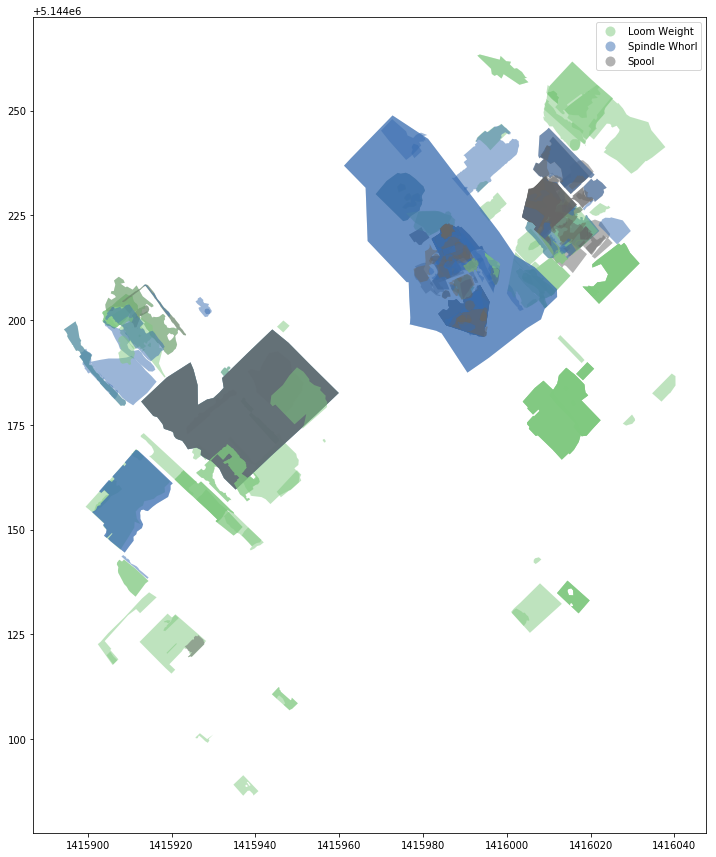

In [0]:
# If we want to see this result as a map, we just add the .plot command to the end of the dataframe's name

gabii_textools.plot(column='SF_OBJECT_TYPE', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)

OK, what do you see here? Compare the distribution of each type of textile tool. Do some types seem to be concentrated in certain areas? How might you check? What factors might contribute to this pattern? Do big layer simply aggregate lots of stuff? Do late dumps contain early materials? Why would one type of tool appear where the others don't?

In [0]:
# We can try and see the relationship between layer size and count by sorting
#our list of finds by the surface area of each layer.
# We use the command 'sort_values'
gabii_textools.sort_values(by=['Shape_Area'],ascending=False)

,DESCRIPTIO,OBJECTID,SU,Shape_Area,Shape_Length,geometry,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
198,DEP,3216,3256,1452.330497,168.149143,"POLYGON Z ((1415990.612 5144187.469 63.100, 14...",1021,spindle whorl,Spindle Whorl
197,DEP,3216,3256,1452.330497,168.149143,"POLYGON Z ((1415990.612 5144187.469 63.100, 14...",1000,spindle whorl,Spindle Whorl
99,DEP,1886,1016,836.932636,140.946953,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1993,spool,Spool
95,DEP,1886,1016,836.932636,140.946953,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",30,spindle whorl,Spindle Whorl
97,DEP,1886,1016,836.932636,140.946953,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1991,spindle whorl frag,Spindle Whorl
98,DEP,1886,1016,836.932636,140.946953,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1992,spool,Spool
96,DEP,1886,1016,836.932636,140.946953,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",110,loom weight,Loom Weight
158,DEP,2832,5091,228.505382,77.127003,"POLYGON Z ((1415920.278 5144161.050 64.109, 14...",786,spindle whorl,Spindle Whorl
159,DEP,2832,5091,228.505382,77.127003,"POLYGON Z ((1415920.278 5144161.050 64.109, 14...",824,spindle whorl,Spindle Whorl
139,DEP,2726,5052,202.047281,70.069538,"POLYGON Z ((1415911.561 5144169.163 64.839, 14...",757,loom weight,Loom Weight


In [0]:
# We have a couple enormous colluvial layers that should probably be excuded.
# Outliers will mess with your analysis. Cut out these layers by excluding SUs with a surface area greater than 800.
gabii_textools2 = gabii_textools.loc[gabii_textools['Shape_Area']<800]
# If we want to see this result as a map, we just add the .plot command to the end again.


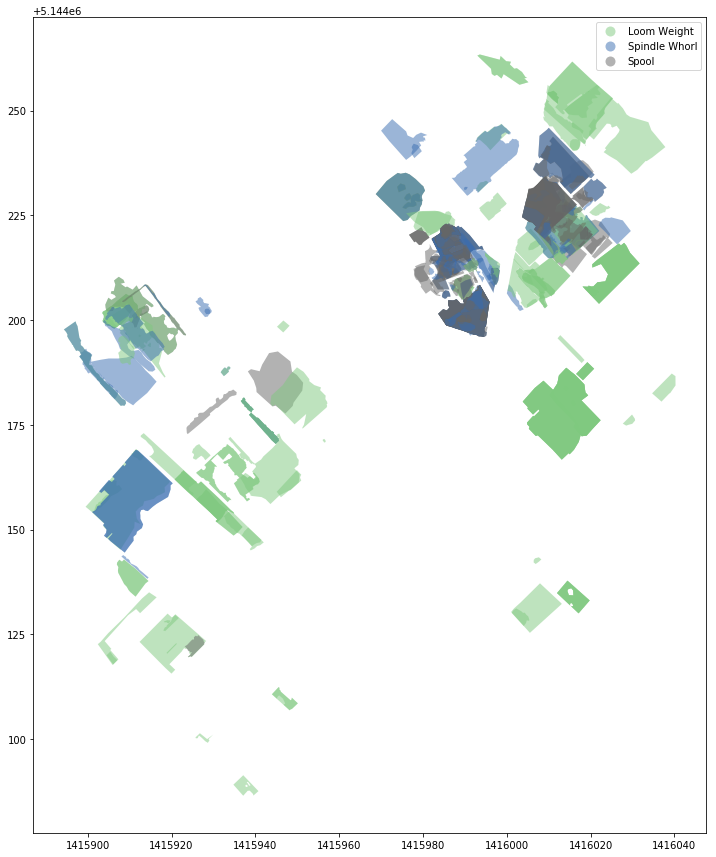

In [0]:
# That's better. Plot the results to see that you've removed the big colluvial layers.
gabii_textools2.plot(column='SF_OBJECT_TYPE', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)

In [0]:
# OK, count up how many of each tool type appears in each SU using the 'groupby' command
textools_counts = gabii_textools2.groupby('SU')['SF_OBJECT_TYPE'].value_counts().unstack().fillna(0)
# Sort the list so that the SUs with the most stuff end up at the top.
textools_counts.sort_values(by=['Loom Weight','Spindle Whorl','Spool'], ascending=False)

SF_OBJECT_TYPE,Loom Weight,Spindle Whorl,Spool
SU,,,
8118,18.0,0.0,0.0
8318,10.0,0.0,0.0
427,8.0,0.0,0.0
2385,5.0,0.0,0.0
2002,4.0,4.0,4.0
1279,4.0,1.0,0.0
3118,4.0,0.0,0.0
5572,4.0,0.0,0.0
7180,4.0,0.0,0.0


In [0]:
# Merge your textile tool counts with your spatial data for the contexts
# Because both dataframes have a 'SU' column, you can use this to match up the rows. 
gabii_textools_counts = gabii_su_poly.merge(textools_counts, on='SU')
gabii_textools_counts.head()

,DESCRIPTIO,OBJECTID,SU,Shape_Area,Shape_Length,geometry,Loom Weight,Spindle Whorl,Spool
0,DEP,28,2258,77.018159,45.450094,"POLYGON Z ((1416013.191 5144212.531 61.348, 14...",0.0,0.0,1.0
1,DEP,44,516,43.687257,39.119255,"POLYGON Z ((1415914.183 5144202.085 64.693, 14...",1.0,0.0,1.0
2,DEP,53,587,63.212851,42.805154,"POLYGON Z ((1415907.641 5144196.961 64.633, 14...",1.0,0.0,0.0
3,DEP,77,1306,21.609902,35.183961,"POLYGON Z ((1415935.544 5144182.803 63.413, 14...",0.0,0.0,1.0
4,DEP,115,1327,122.494594,52.841679,"POLYGON Z ((1415936.349 5144162.362 63.122, 14...",1.0,0.0,0.0


Side by side plots of different variables can help you to visualize the differences between the spatial patterns you're exploring.

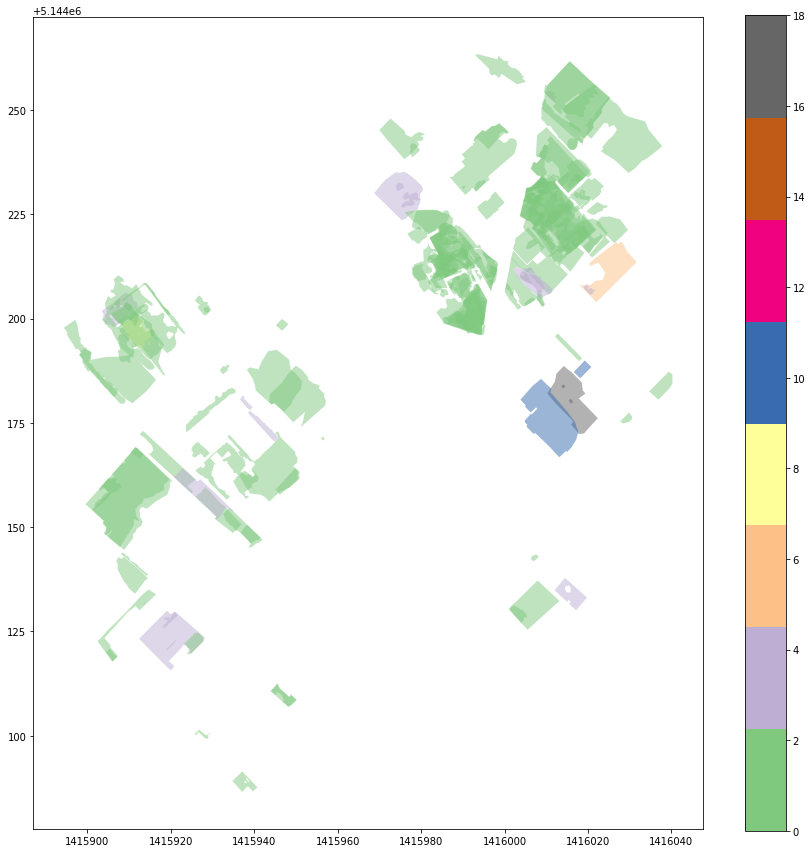

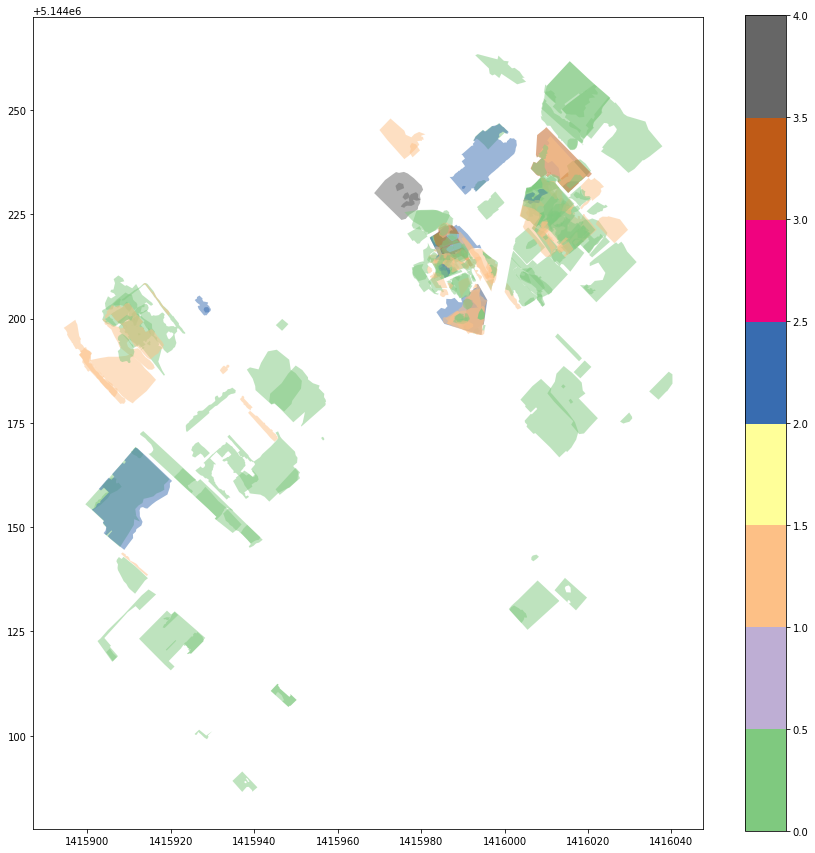

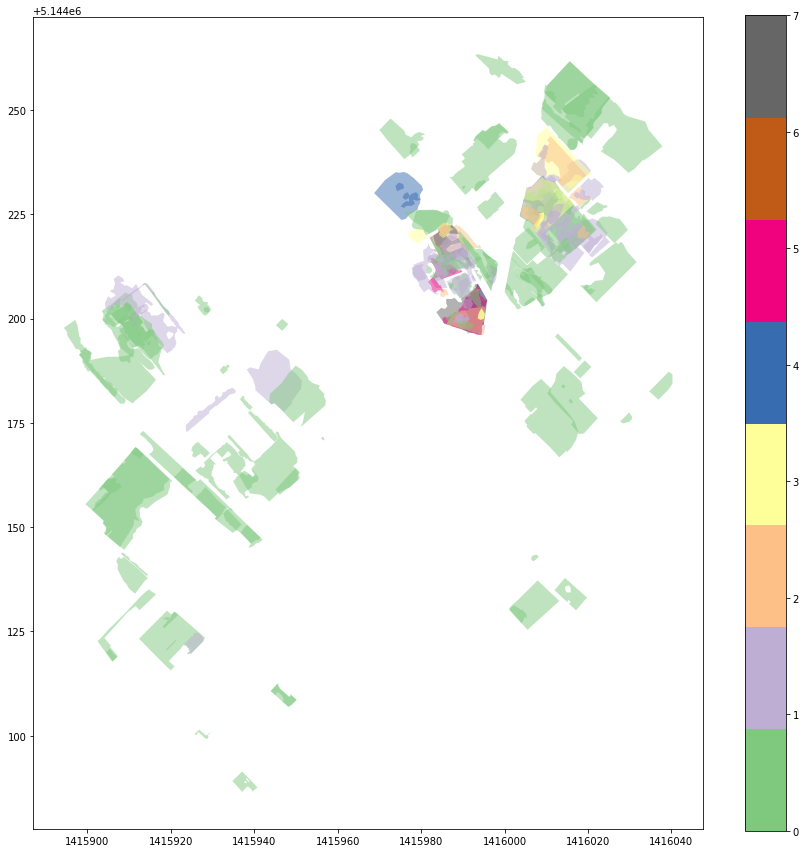

In [0]:
# Let's start by looking at each class of textile tool individually. 
# Plot the counts of each type of find spatially
gabii_textools_counts.plot(column='Loom Weight', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)
gabii_textools_counts.plot(column='Spindle Whorl', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)
gabii_textools_counts.plot(column='Spool', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)


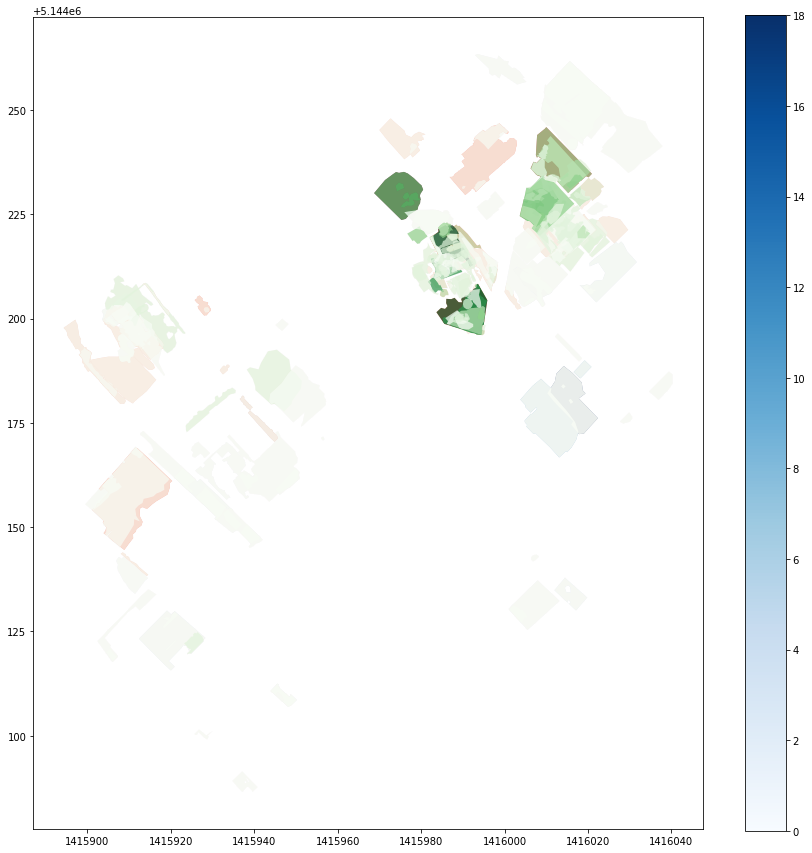

In [0]:
base = gabii_textools_counts.plot(column='Loom Weight', cmap='Blues', figsize=(15, 15), legend=True, alpha=0.7)
gabii_textools_counts.plot(ax=base, column='Spindle Whorl', cmap='Reds', alpha=0.7)
gabii_textools_counts.plot(ax=base, column='Spool', cmap='Greens', alpha=0.7);


(1415887.009595, 1416047.574505, 5144077.642320001, 5144272.24288)

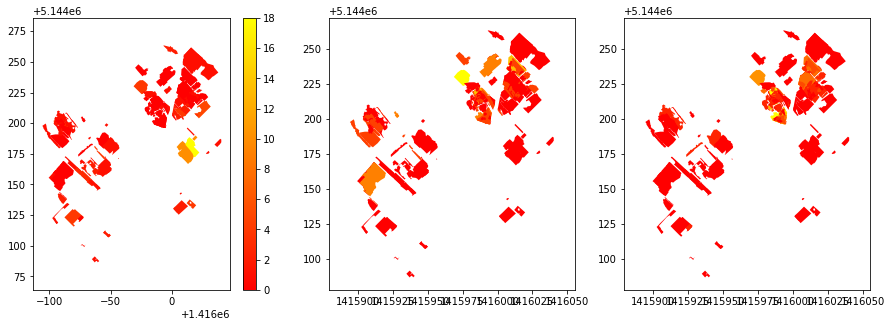

In [0]:
# It's hard to see what's happening when we have to scroll. 
# Let's put the maps side by side.
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=3,figsize=(15, 5))
gabii_textools_counts.plot(column='Loom Weight', cmap='autumn',  ax=axes[0], legend=True).axis('equal')
gabii_textools_counts.plot(column='Spindle Whorl', cmap='autumn', ax=axes[1]).axis('equal')
gabii_textools_counts.plot(column='Spool', cmap='autumn',ax=axes[2]).axis('equal')

Can you see any patterns here? Do the different types of tools concentrate in the same parts of the site? Why might different types of tools have different distributions? 

OK, this next big scary cell is because google has broken something in colab after I drafted this exercise. Push run to fix the thing they've broken (hopefully).

In [0]:

#@title
!apt-get install -qq curl g++ make
#@title
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
#@title
import os
os.chdir('spatialindex-src-1.8.5')
#@title
!./configure
#@title
!make
#@title
!make install
#@title
!pip install rtree
#@title
!ldconfig
#Working through the example at http://toblerity.org/rtree/examples.html
#@title
from rtree import index
from rtree.index import Rtree
#@title
p = index.Property()
idx = index.Index(properties=p)
idx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  3233k      0 --:--:-- --:--:-- --:--:-- 3233k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [0]:
# I think the distributions of different weaving tools vary.
# To investigate further, we are going to need more tools.
!pip install pysal
import pysal
from sklearn import cluster
import seaborn as sns
import numpy as np

     |████████████████████████████████| 25.0MB 1.2MB/s 
  Created wheel for pysal: filename=pysal-2.1.0-py2.py3-none-any.whl size=25330028 sha256=1eb4852112440487b0c80a1235681cd2e01fb76a6198593580a025e20bf97a88
  Stored in directory: /root/.cache/pip/wheels/d3/83/3d/697615f4ce74486679f237d1d6a1cf70cd742fa6a34baba744
Successfully built pysal


/usr/local/lib/python3.6/dist-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"


We're going to use cluster analysis to try and better understand our patterns. Clustering is a broad set of techniques for finding groups within a data set. When we cluster observations, we want items in the same group to be similar and items in different groups to be dissimilar. Clustering allows us to identify which things are alike on the basis of multiple characteristics. K-means clustering is a simple and frequently applied clustering method for splitting a dataset into a set of k (k being an arbitrary number you get to choose) groups.

In [0]:
# Next step: cluster together contexts where the pattern of the three types of textile tools are similar, 
# with and without respect to the size of the context.
# Make 5 clusters and account for the size of the context and counts of different types of tools. Drop all the other fields.
km5 = cluster.KMeans(n_clusters=5)
km5cls = km5.fit(gabii_textools_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'], axis=1).values)
km5cls

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Each cluster produced should contain the SUs that are similar to one another on the basis of the number of each type of textile tool and the size of the surface area of the SU. 

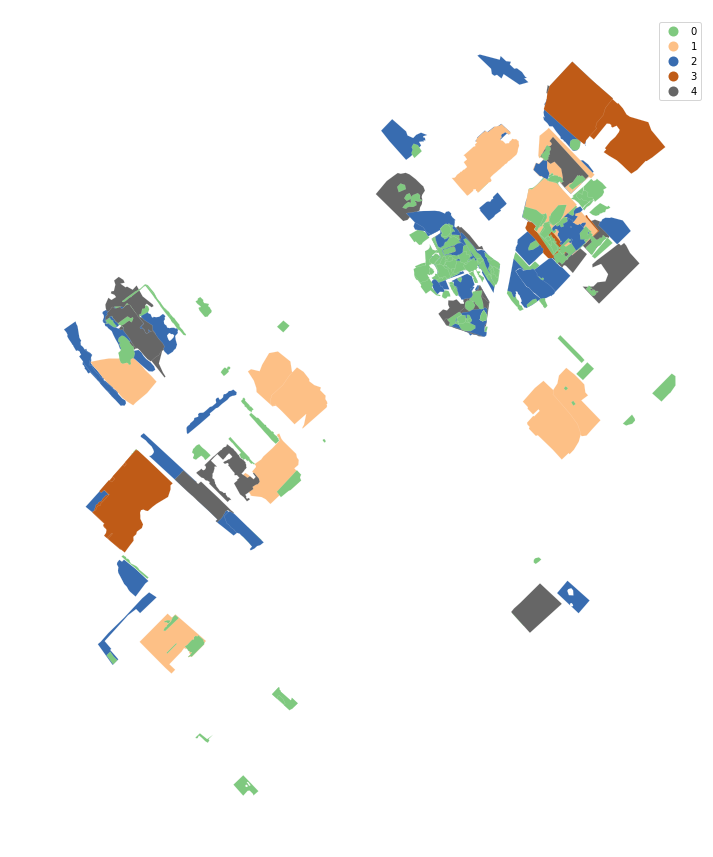

In [0]:

# Plot the clusters, groups of contexts that have similar textile tool assemblages.
# Give a different colour to the SUs that belong to each cluster.

f1, ax = plt.subplots(1, figsize=(15,15))

gabii_textools_counts.assign(cl=km5cls.labels_)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

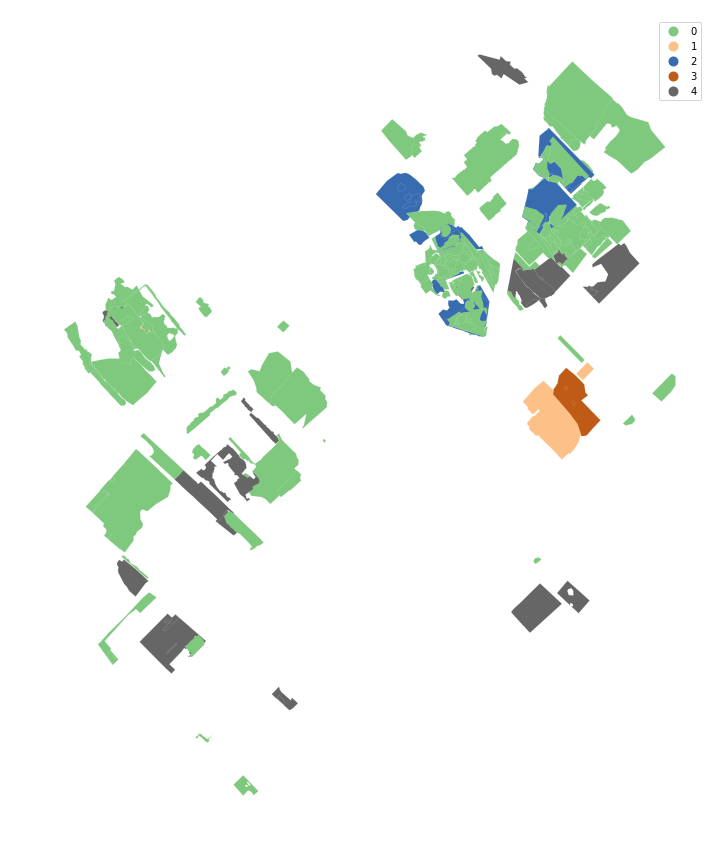

In [0]:
#Do the same, ignoring the size of the context.
km5 = cluster.KMeans(n_clusters=5)
km5cls2 = km5.fit(gabii_textools_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU','Shape_Area'], axis=1).values)
f2, ax = plt.subplots(1, figsize=(15,15))

gabii_textools_counts.assign(cl2=km5cls2.labels_)\
   .plot(column='cl2', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

The patterns are definitely different. How can we interpret the fact that context size affects the pattern of the distribution of textile tools? Do big units, which perhaps represent dumps or colluvial mashups, have a fundamentally different character than the varied small contexts?

(1415887.0095949997, 1416047.5745049997, 5144077.642320001, 5144272.24288)

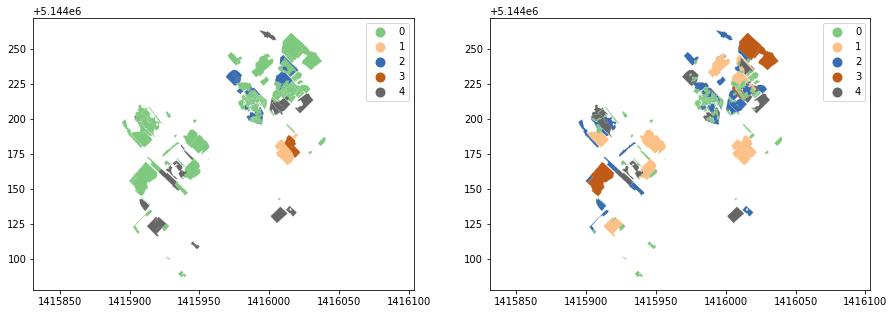

In [0]:
# Look at the difference with and without context size taken into accoutn.
fig, axes = plt.subplots(ncols=2,figsize=(15, 5))
gabii_textools_counts.assign(cl2=km5cls2.labels_)\
   .plot(column='cl2', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=axes[0]).axis('equal')
gabii_textools_counts.assign(cl=km5cls.labels_)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=axes[1]).axis('equal')



In [0]:
# assign the cluster IDs to each context permanently
gabiitextools_clas = gabii_textools_counts.assign(cl=km5cls.labels_)
gabiitextools_class = gabiitextools_clas.assign(cl2=km5cls2.labels_)
gabiitextools_class.head()

,DESCRIPTIO,OBJECTID,SU,Shape_Area,Shape_Length,geometry,Loom Weight,Spindle Whorl,Spool,cl,cl2
0,DEP,28,2258,77.018159,45.450094,"POLYGON Z ((1416013.191 5144212.531 61.348, 14...",0.0,0.0,1.0,4,0
1,DEP,44,516,43.687257,39.119255,"POLYGON Z ((1415914.183 5144202.085 64.693, 14...",1.0,0.0,1.0,2,0
2,DEP,53,587,63.212851,42.805154,"POLYGON Z ((1415907.641 5144196.961 64.633, 14...",1.0,0.0,0.0,4,0
3,DEP,77,1306,21.609902,35.183961,"POLYGON Z ((1415935.544 5144182.803 63.413, 14...",0.0,0.0,1.0,2,0
4,DEP,115,1327,122.494594,52.841679,"POLYGON Z ((1415936.349 5144162.362 63.122, 14...",1.0,0.0,0.0,1,0


(1415887.0095949997, 1416047.5745049997, 5144077.727750001, 5144270.44885)

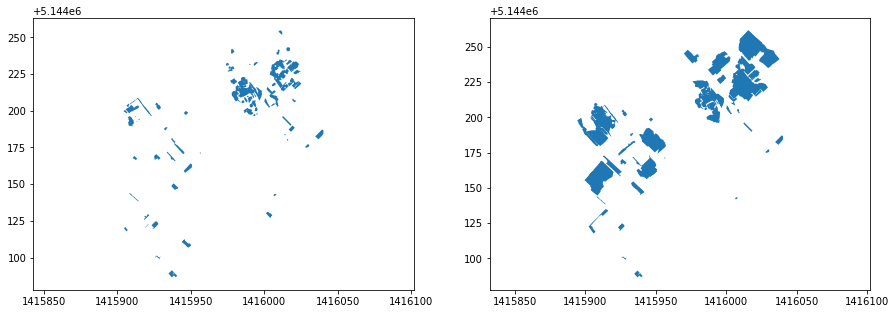

In [0]:
# Now let's look at some individual classes, with and without context size accounted for in the analyses.
gabiitextools_class0=gabiitextools_class.loc[gabiitextools_class['cl']==0]
gabiitextools_class0noarea=gabiitextools_class.loc[gabiitextools_class['cl2']==0]
fig, axes = plt.subplots(ncols=2,figsize=(15, 5))
gabiitextools_class0.plot(ax=axes[0], legend=True).axis('equal')
gabiitextools_class0noarea.plot(ax=axes[1]).axis('equal')

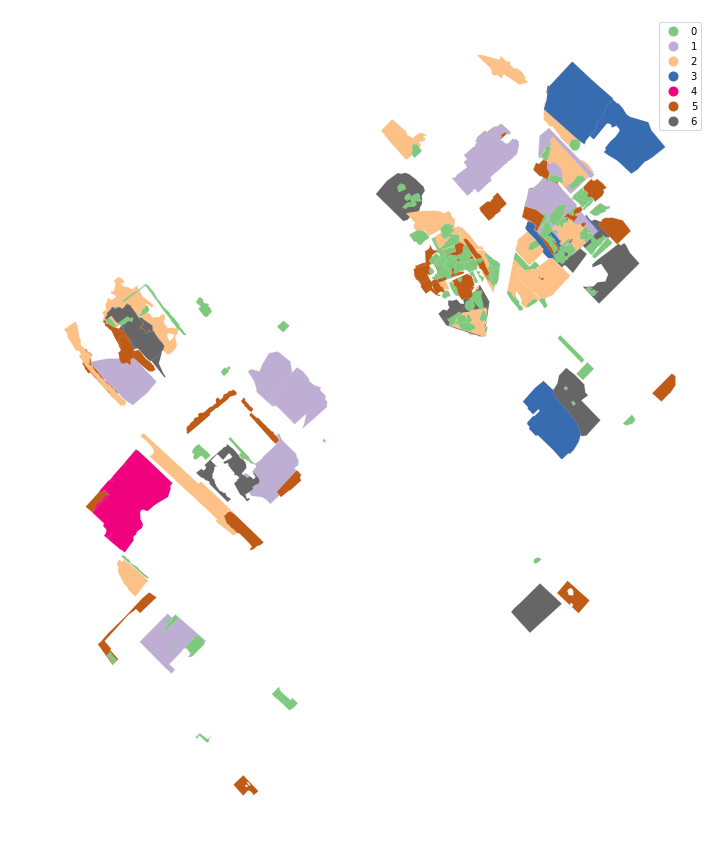

In [0]:
# What happens when we change the number of clusters (groups)?
km7 = cluster.KMeans(n_clusters=7)
km7cls3 = km7.fit(gabii_textools_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'], axis=1).values)
f3, ax = plt.subplots(1, figsize=(15,15))

gabii_textools_counts.assign(cl3=km7cls3.labels_)\
   .plot(column='cl3', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

That also changes things. Without going into too much detail, finding the ideal number of clusters is a black art. Try playing around with the number of clusters in the notebook, or the size cut-off for inclusion. 

Cluster analysis is an important statistical technique. While not the main focus of this course, it's worth learning more about it. I encourage you to do some independent reading on this technique.

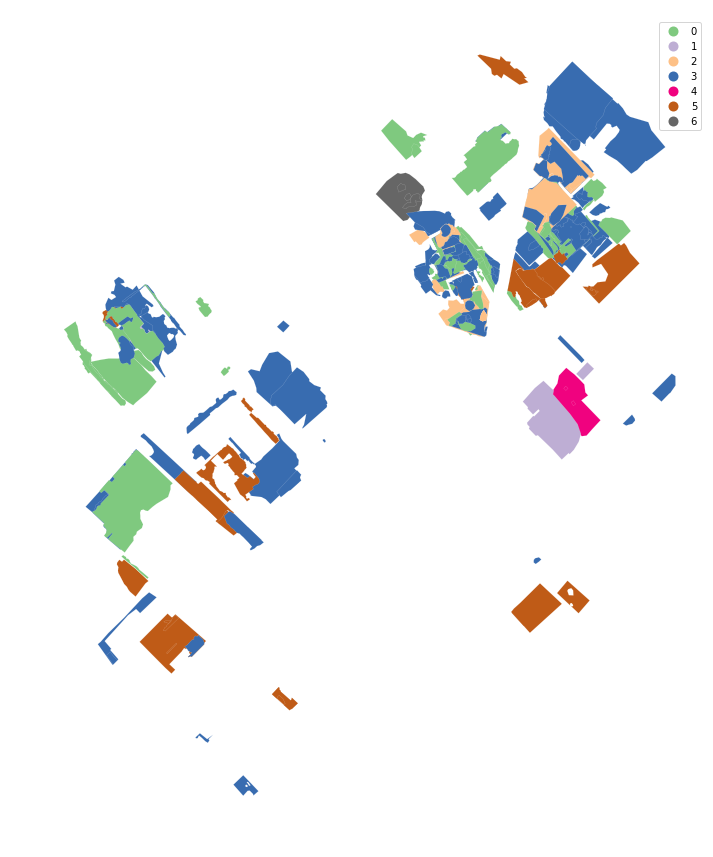

In [0]:
# Use 7 clusters and plot them
km7 = cluster.KMeans(n_clusters=7)
km7cls4 = km7.fit(gabii_textools_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU','Shape_Area'], axis=1).values)
f4, ax = plt.subplots(1, figsize=(15,15))

gabii_textools_counts.assign(cl4=km7cls4.labels_)\
   .plot(column='cl4', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

In [0]:
# Let's set up to investigate some of the individual clusters
gabiitextools_class3=gabiitextools_class.assign(cl3=km7cls3.labels_)
gabiitextools_class4=gabiitextools_class3.assign(cl4=km7cls4.labels_)
gabiitextools_class4.head()


,DESCRIPTIO,OBJECTID,SU,Shape_Area,Shape_Length,geometry,Loom Weight,Spindle Whorl,Spool,cl,cl2,cl3,cl4
0,DEP,28,2258,77.018159,45.450094,"POLYGON Z ((1416013.191 5144212.531 61.348, 14...",0.0,0.0,1.0,4,0,6,3
1,DEP,44,516,43.687257,39.119255,"POLYGON Z ((1415914.183 5144202.085 64.693, 14...",1.0,0.0,1.0,2,0,2,3
2,DEP,53,587,63.212851,42.805154,"POLYGON Z ((1415907.641 5144196.961 64.633, 14...",1.0,0.0,0.0,4,0,6,3
3,DEP,77,1306,21.609902,35.183961,"POLYGON Z ((1415935.544 5144182.803 63.413, 14...",0.0,0.0,1.0,2,0,5,3
4,DEP,115,1327,122.494594,52.841679,"POLYGON Z ((1415936.349 5144162.362 63.122, 14...",1.0,0.0,0.0,1,0,1,3


Text(0.5, 1.0, 'cl - 7 clusters - no area')

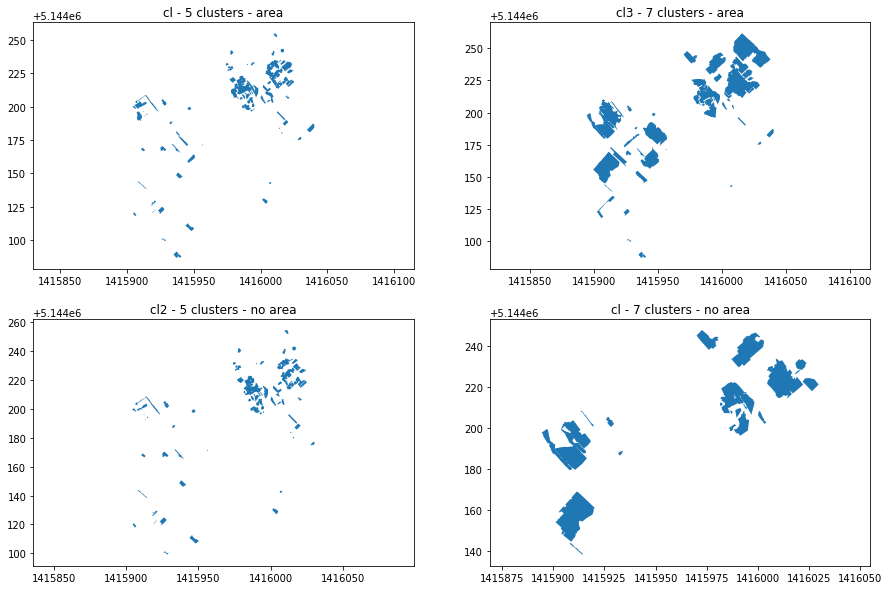

In [0]:
# set up variables to store several classes, with and without context size taken into account.
gabiitextools_class0=gabiitextools_class4.loc[gabiitextools_class4['cl']==0]
gabiitextools_class0noarea=gabiitextools_class4.loc[gabiitextools_class4['cl2']==0]
gabiitextools_k7_class0=gabiitextools_class4.loc[gabiitextools_class4['cl3']==0]
gabiitextools_k7_class0noarea=gabiitextools_class4.loc[gabiitextools_class4['cl4']==0]
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))
gabiitextools_class0.plot(ax=axes[0,0]).axis('equal')
axes[0,0].set_title('cl - 5 clusters - area')
gabiitextools_class0noarea.plot(ax=axes[0,1]).axis('equal')
axes[1,0].set_title('cl2 - 5 clusters - no area')
gabiitextools_k7_class0.plot(ax=axes[1,0]).axis('equal')
axes[0,1].set_title('cl3 - 7 clusters - area')
gabiitextools_k7_class0noarea.plot(ax=axes[1,1]).axis('equal')
axes[1,1].set_title('cl - 7 clusters - no area')

Text(0.5, 1.0, 'cl - 7 clusters - no area')

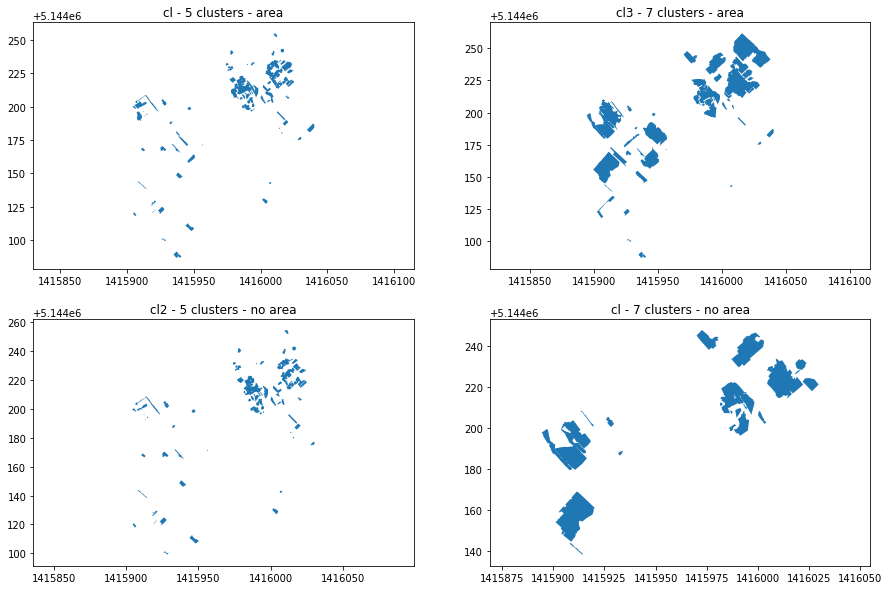

In [0]:
# now try soem different clusters
gabiitextools_class3=gabiitextools_class4.loc[gabiitextools_class4['cl']==3]
gabiitextools_class3noarea=gabiitextools_class4.loc[gabiitextools_class4['cl2']==3]
gabiitextools_k7_class3=gabiitextools_class4.loc[gabiitextools_class4['cl3']==3]
gabiitextools_k7_class3noarea=gabiitextools_class4.loc[gabiitextools_class4['cl4']==3]
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))
gabiitextools_class0.plot(ax=axes[0,0]).axis('equal')
axes[0,0].set_title('cl - 5 clusters - area')
gabiitextools_class0noarea.plot(ax=axes[0,1]).axis('equal')
axes[1,0].set_title('cl2 - 5 clusters - no area')
gabiitextools_k7_class0.plot(ax=axes[1,0]).axis('equal')
axes[0,1].set_title('cl3 - 7 clusters - area')
gabiitextools_k7_class0noarea.plot(ax=axes[1,1]).axis('equal')
axes[1,1].set_title('cl - 7 clusters - no area')

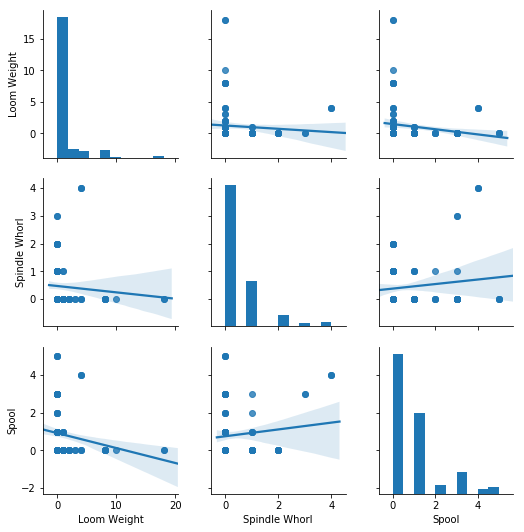

In [0]:
# Do 7 clusters as oppossed to 5 result in more correlation?
sns.pairplot(gabiitextools_k7_class0.drop(['OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','SU','geometry','cl','cl2','cl3','cl4'], axis=1), kind="reg")
plt.show()

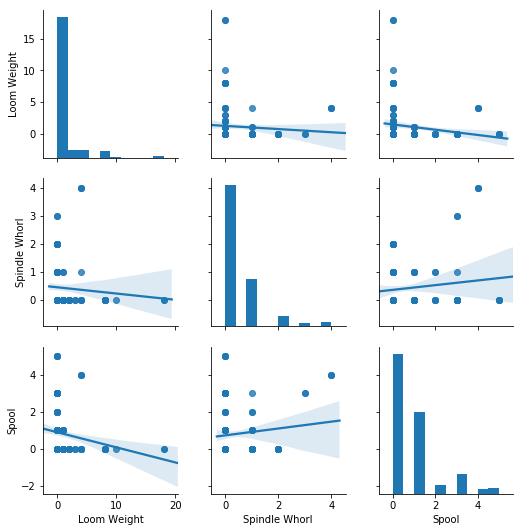

In [0]:
# Are some clusters more correlated than others?
sns.pairplot(gabiitextools_class0.drop(['OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','SU','geometry','cl','cl2','cl3','cl4'], axis=1), kind="reg")
plt.show()


### That concludes this tutorial.

Hopefully you have:
* started thinking (and perhaps are a bit confused) about how spatial patterns of different types of finds are created, and how we can interpret them when studying data from an excavation.
* learned to combine spatial data and descriptive tables. 
* learned to use some basic clustering tools, and reinforced your knowledge about how to make charts and maps. 
